# Chess games analysis project



my goal: a machine learning model that predicts the rating of players from games.
At first, i'll use pandas to work with the data, and import some data visualisation libraries to do some exlporing and see what i can work with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


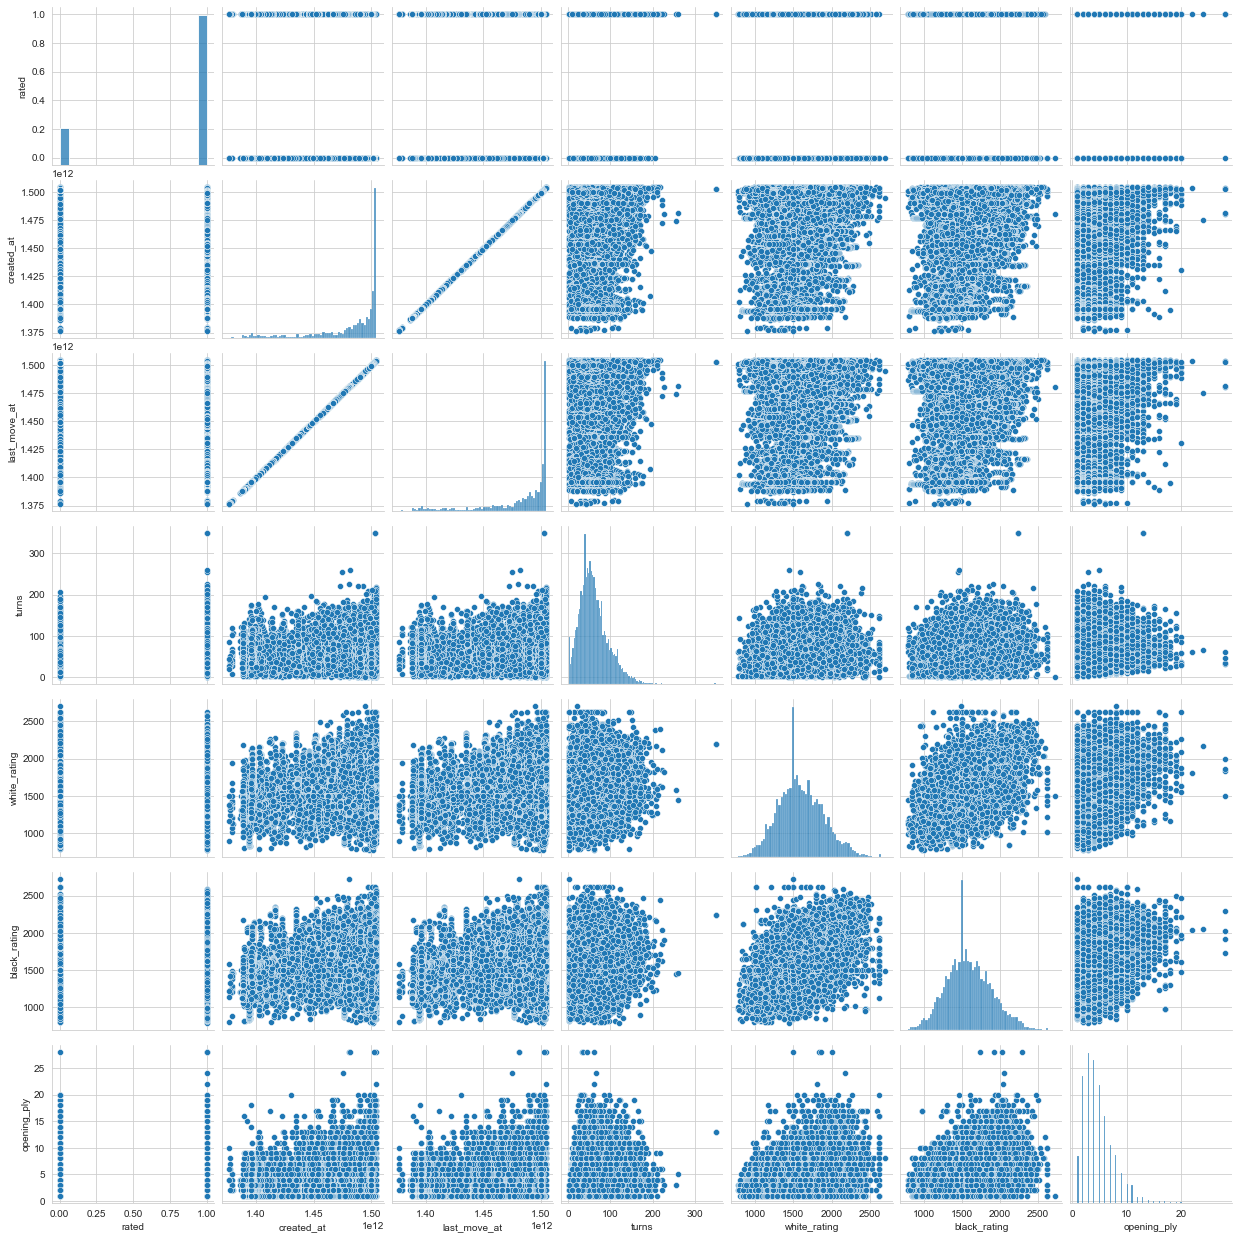

In [6]:
sns.pairplot(df)

So, after a brief look at the data and the plots, i can notice  a few important things:


<AxesSubplot:xlabel='created_at', ylabel='last_move_at'>

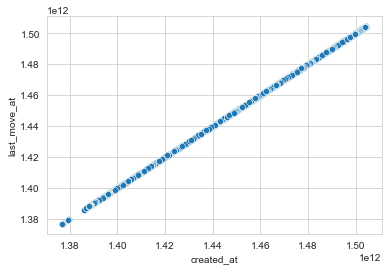

In [7]:
sns.scatterplot(data = df, x= 'created_at',y='last_move_at')

clearly, these columns store the same information, and the 'turns' column will be a better measurment for the length of each game.
I'll drop these two columns.

In [8]:
df.drop(['created_at','last_move_at'], axis = 1,inplace = True)

also, the 'rated' column seems to be useless.

In [9]:
df.drop(['rated'], axis = 1,inplace = True)

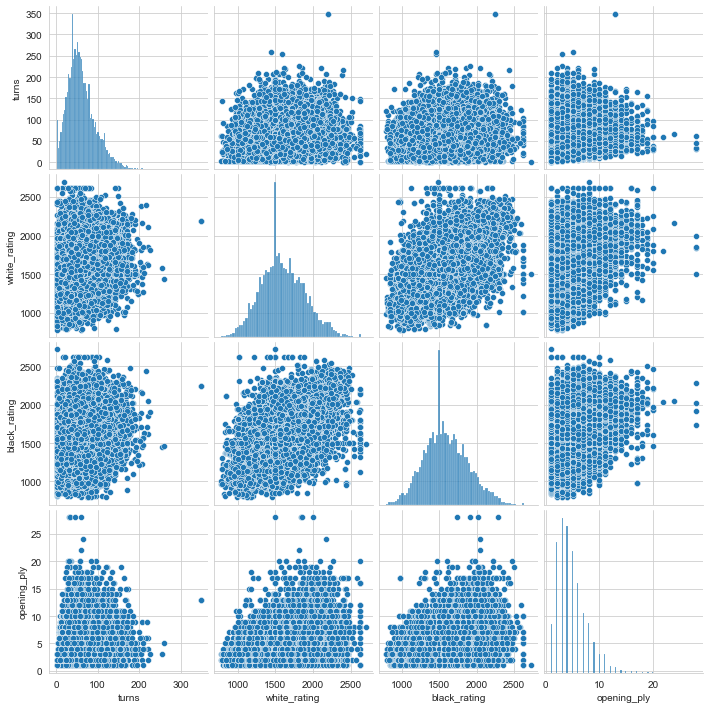

In [10]:
sns.pairplot(df)

thats more like it :) 
lets check out the correlation between the continuous variables:

<AxesSubplot:>

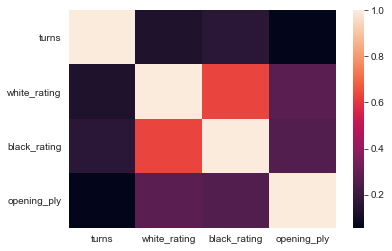

In [11]:
corr = df.corr()
sns.heatmap(corr)

there is a strong corrrelation between white's rating and black's rating, but it is known that Lichess will match the players by their rating, so using the opposite color's rating will be kind of cheating. 

Now let's check out the categorical data:

In [12]:
df.select_dtypes(include = 'object').columns.to_series().tolist()

['id',
 'victory_status',
 'winner',
 'increment_code',
 'white_id',
 'black_id',
 'moves',
 'opening_eco',
 'opening_name']

the column 'opening_eco' is actually a universal key for known opennings in chess.
https://www.365chess.com/eco.php


In [13]:
df['opening_name'].value_counts()

Van't Kruijs Opening                                                    368
Sicilian Defense                                                        358
Sicilian Defense: Bowdler Attack                                        296
Scotch Game                                                             271
French Defense: Knight Variation                                        271
                                                                       ... 
King's Gambit Accepted |  Salvio Gambit                                   1
Bishop's Opening: Lewis Gambit                                            1
Italian Game: Scotch Gambit |  Max Lange Attack |  Spielmann Defense      1
Sicilian Defense: Smith-Morra Gambit Accepted |  Morphy Defense           1
Italian Game: Scotch Gambit |  de Riviere Defense                         1
Name: opening_name, Length: 1477, dtype: int64

In [14]:
df['opening_eco'].value_counts()

A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
B74       1
D59       1
D22       1
A89       1
D16       1
Name: opening_eco, Length: 365, dtype: int64

Looks like opening_eco will be more suitable to be converted to indicators, and opening_name has too many unique values, so i'll drop it.

In [15]:
df.drop('opening_name',axis = 1,inplace = True)

now, to not over-fit the model, i'll classify all below 25 appearences as OTHER.

In [16]:
opening_c = df['opening_eco'].value_counts()

In [17]:
def make_other(key):
    if opening_c.loc[key]<25 :
        return 'OTHER'
    else:
        return key
    

In [18]:
df['opening_eco'].apply(make_other).nunique()

121

turn's out that only 121 openings were playes at least 25 times. 

In [19]:
df['opening_eco'] = df['opening_eco'].apply(make_other)

<AxesSubplot:xlabel='opening_eco', ylabel='count'>

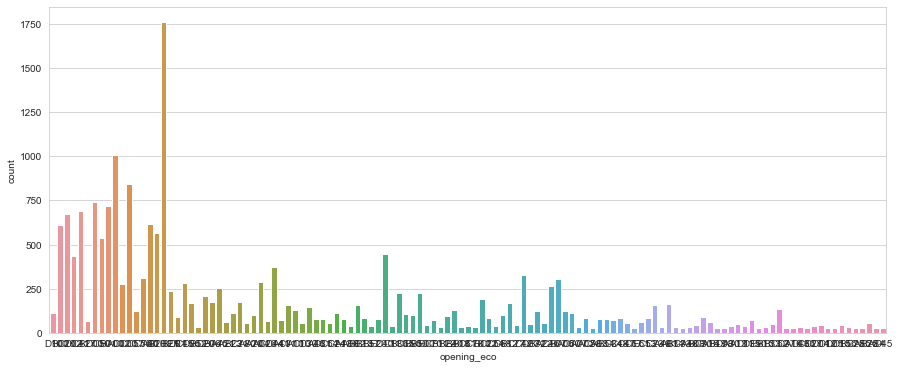

In [20]:
plt.figure(figsize = (15,6))

sns.countplot( x = df['opening_eco'])

In [21]:
len(df[df['opening_eco']=='OTHER'])

1759

1759/20000 is less then 10% , feels like a good ratio.

increment_code is like the "type" of the game - how much time each player has, and the time added each move.

i'll use the same technique with this column:

In [22]:
sum(df['increment_code'].value_counts()>25)

72

In [23]:
inc_c = df['increment_code'].value_counts()

In [24]:
def make_other2(key):
    if inc_c.loc[key]<25 :
        return 'OTHER'
    else:
        return key



In [25]:
df['increment_code'] = df['increment_code'].apply(make_other2)

'winner' column sounds OK to use as an indicator variable:

In [26]:
df['winner'].unique()

array(['white', 'black', 'draw'], dtype=object)

In [27]:
df['moves'].nunique()

18920

'moves' column is too informative. there are only a handful of idnetical games.

ill drop it along with the other columns i don't intend to use.

In [28]:
df.drop(['moves','white_id','black_id','id'],axis = 1,inplace = True)

In [29]:
df

,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply
0,13,outoftime,white,15+2,1500,1191,D10,5
1,16,resign,black,5+10,1322,1261,B00,4
2,61,mate,white,5+10,1496,1500,C20,3
3,61,mate,white,20+0,1439,1454,D02,3
4,95,mate,white,OTHER,1523,1469,C41,5
...,...,...,...,...,...,...,...,...
20053,24,resign,white,10+10,1691,1220,A80,2
20054,82,mate,black,10+0,1233,1196,A41,2
20055,35,mate,white,10+0,1219,1286,D00,3
20056,109,resign,white,10+0,1360,1227,B07,4


now it's time to convert all of the categorical variables to indicators:

In [30]:
dum = pd.get_dummies(df['victory_status'],drop_first=True)
df = pd.concat([df,dum],axis=1)
df.drop('victory_status',axis =1,inplace=True)

dum = pd.get_dummies(df['winner'],drop_first=True)
df = pd.concat([df,dum],axis=1)
df.drop('winner',axis =1,inplace=True)

dum = pd.get_dummies(df['increment_code'],drop_first=True)
df = pd.concat([df,dum],axis=1)
df.drop('increment_code',axis =1,inplace=True)

dum = pd.get_dummies(df['opening_eco'],drop_first=True)
df = pd.concat([df,dum],axis=1)
df.drop('opening_eco',axis =1,inplace=True)

finally, a quick check for missing values:

In [31]:
sum(df.isnull().sum()>0)

0

0 is good for us.

time to do some ML! first model, Linear Regression.

here i will try to predict black's rating, but it really does'nt matter black or white.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(['white_rating','black_rating'],axis = 1)
y = df['black_rating']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
pred = lm.predict(X_test)

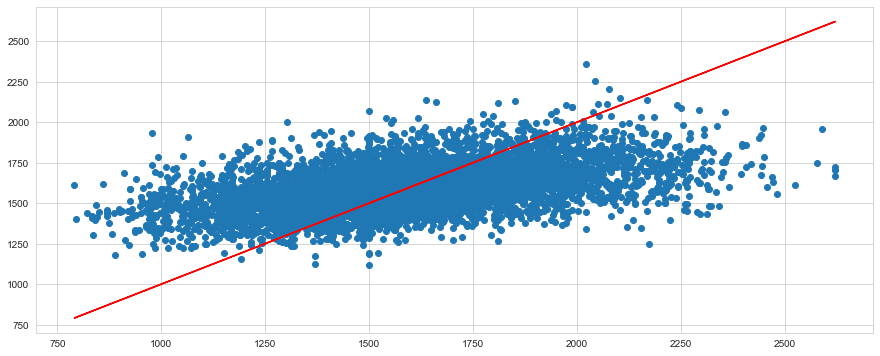

In [39]:
plt.figure(figsize = (15,6))

plt.scatter(x = y_test,y = pred,)
plt.plot(y_test,y_test,'r')


In [40]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 200.3751498900991
MSE: 64199.68699909225
RMSE: 253.3765715276222


overall, not bad. RMSE of 253 is about 16%, so the model is about 84% correct!

Up next: Neural Network. 

In [41]:
df

,turns,white_rating,black_rating,opening_ply,mate,outoftime,resign,draw,white,10+1,...,D31,D35,D37,D43,D45,E00,E20,E61,E90,OTHER
0,13,1500,1191,5,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,16,1322,1261,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,1496,1500,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,61,1439,1454,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,95,1523,1469,5,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,24,1691,1220,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20054,82,1233,1196,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20055,35,1219,1286,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20056,109,1360,1227,4,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [43]:
model = Sequential()

model.add(Dense(177,activation='relu'))

model.add(Dense(286,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=100)

Epoch 1/100
110/110 [==============================] - 0s 2ms/step - loss: 2217704.7500 - val_loss: 1010021.7500
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 285868.2812 - val_loss: 142610.3125
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 123784.3359 - val_loss: 108669.6953
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 98022.0938 - val_loss: 89676.6797
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 83824.6172 - val_loss: 79434.6875
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 76499.7344 - val_loss: 74584.8125
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 72913.6484 - val_loss: 72136.8438
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 71106.2266 - val_loss: 70841.5703
Epoch 9/100
110/110 [==============================] - 0s 1ms/step - loss: 70249.5234 - val_loss: 70098.9609
Epoch 10/10

In [48]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

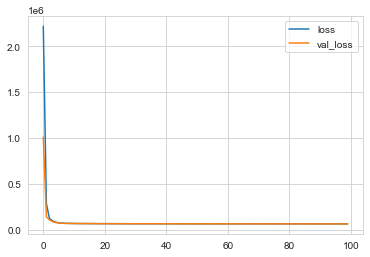

In [49]:
losses.plot()

In [50]:
predictions = model.predict(X_test)

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 200.09202255700347
MSE: 64562.29290507365
RMSE: 254.09111142476758


well , the NN model did pretty much the same as the LR model!

In [52]:
254/df['black_rating'].mean()

0.15986586501301964

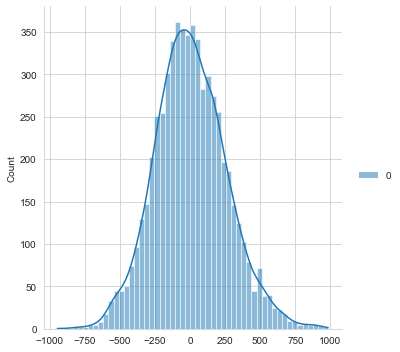

In [53]:
errors = y_test.values.reshape(6018, 1) - predictions
sns.displot(errors,kde=True)

as i expected, the errors have a nice normal distribution. 